### Entrada de dados

In [280]:
import pandas as pd
import numpy as np

data = pd.read_csv("edges1.csv",names=["Inicio", "Fim", "Peso"], encoding = "ISO-8859-1")
data

,Inicio,Fim,Peso
0,A,B,5
1,A,C,7
2,A,D,1
3,B,C,2
4,C,D,6
5,C,E,5
6,D,B,3
7,D,F,5
8,D,G,3
9,E,F,4


In [14]:
for i in range(len(data["Inicio"])):
    G = nx.Graph()
    G.add_edge(data["Inicio"][i], data["Fim"][i], weight=data["Peso"][i])

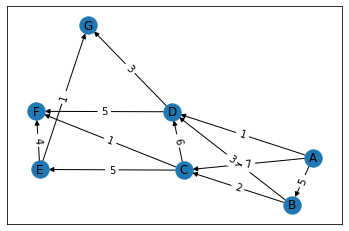

In [72]:
import networkx as nx
import pylab


def plot(Grafo):
    G = nx.Graph()
    for i in range(len(Grafo["Inicio"])):
        G.add_edge(Grafo["Inicio"][i], Grafo["Fim"][i], weight=Grafo["Peso"][i])

    pos=nx.spring_layout(G)
    nx.draw_networkx(G,pos, arrows=True) #, arrows=True
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    pylab.show()
    return G
retorno = plot(data)

In [282]:
N = {}
vertices = []
for i in range(len(data["Inicio"])):
    if data["Inicio"][i] not in vertices:
        vertices.append(data["Inicio"][i])
    N[(data["Inicio"][i],data["Fim"][i])] = data["Peso"][i]
N

{('A', 'B'): 5,
 ('A', 'C'): 7,
 ('A', 'D'): 1,
 ('B', 'C'): 2,
 ('C', 'D'): 6,
 ('C', 'E'): 5,
 ('D', 'B'): 3,
 ('D', 'F'): 5,
 ('D', 'G'): 3,
 ('E', 'F'): 4,
 ('F', 'C'): 1,
 ('G', 'E'): 1}

In [279]:
vertice_atual = "a"
vertice_anterior = -1
caminhos = []
vertices_ = []
while len(caminhos) < len(vertices):
    aux = np.Inf
    for i in N:
        if vertice_atual == i[0]:
            if N[i] < aux:
                aux = N[i]
                vertice_atual_novo = i
                
    vertice_atual = vertice_atual_novo[1]
    if len(caminhos) == 0:
        caminhos.append([aux,vertice_atual_novo[0]])
    else:
        aux += caminhos[len(caminhos)-1][0]
        caminhos.append([aux,vertice_atual_novo[0]])
print(aux)
print(caminhos)

inf
[[1, 'a'], [5, 'f'], [14, 'm'], [inf, 'm'], [inf, 'm'], [inf, 'm'], [inf, 'm'], [inf, 'm'], [inf, 'm'], [inf, 'm'], [inf, 'm'], [inf, 'm']]


In [286]:
N = {}
vertices = []
for i in range(len(data["Inicio"])):
    if data["Inicio"][i] not in vertices:
        vertices.append(data["Inicio"][i])
    N[(data["Inicio"][i],data["Fim"][i])] = data["Peso"][i]
N

{('A', 'B'): 5,
 ('A', 'C'): 7,
 ('A', 'D'): 1,
 ('B', 'C'): 2,
 ('C', 'D'): 6,
 ('C', 'E'): 5,
 ('D', 'B'): 3,
 ('D', 'F'): 5,
 ('D', 'G'): 3,
 ('E', 'F'): 4,
 ('F', 'C'): 1,
 ('G', 'E'): 1}

In [300]:
vertice_atual = "A"
vertice_inicial = vertice_atual
vertice_anterior = -1
caminhos = {}

for i in vertices:
    if i != vertice_atual:
        caminhos[i] = ["",np.inf]
    else:
        caminhos[i] = [i,0]

print(caminhos)

count = 0
while True:
    for i in N:
        if vertice_atual == i[0]:
            #se o valor guardado
            if N[i] < caminhos[i[1]][1]:
                #valor_aux = caminhos[i[0]]  

                caminhos[i[1]] = [i[0],N[i]+caminhos[i[0]][1]]
    aux = np.inf
    for i in caminhos:
        if caminhos[i][1] < aux:
            vertice_atual = i  
    print(caminhos) 
    if count != 100:
        count += 1
    else:
        break
print(caminhos)              

{'A': ['A', 0], 'B': ['', inf], 'C': ['', inf], 'D': ['', inf], 'E': ['', inf], 'F': ['', inf], 'G': ['', inf]}
{'A': ['A', 0], 'B': ['A', 5], 'C': ['A', 7], 'D': ['A', 1], 'E': ['', inf], 'F': ['', inf], 'G': ['', inf]}
{'A': ['A', 0], 'B': ['D', 4], 'C': ['A', 7], 'D': ['A', 1], 'E': ['', inf], 'F': ['D', 6], 'G': ['D', 4]}
{'A': ['A', 0], 'B': ['D', 4], 'C': ['A', 7], 'D': ['A', 1], 'E': ['G', 5], 'F': ['D', 6], 'G': ['D', 4]}
{'A': ['A', 0], 'B': ['D', 4], 'C': ['A', 7], 'D': ['A', 1], 'E': ['G', 5], 'F': ['D', 6], 'G': ['D', 4]}
{'A': ['A', 0], 'B': ['D', 4], 'C': ['A', 7], 'D': ['A', 1], 'E': ['G', 5], 'F': ['D', 6], 'G': ['D', 4]}
{'A': ['A', 0], 'B': ['D', 4], 'C': ['A', 7], 'D': ['A', 1], 'E': ['G', 5], 'F': ['D', 6], 'G': ['D', 4]}
{'A': ['A', 0], 'B': ['D', 4], 'C': ['A', 7], 'D': ['A', 1], 'E': ['G', 5], 'F': ['D', 6], 'G': ['D', 4]}
{'A': ['A', 0], 'B': ['D', 4], 'C': ['A', 7], 'D': ['A', 1], 'E': ['G', 5], 'F': ['D', 6], 'G': ['D', 4]}
{'A': ['A', 0], 'B': ['D', 4], 'C': 